<a href="https://colab.research.google.com/github/francineroh/aulas_python/blob/main/Atividade_pr%C3%A1tica_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTILIZANDO MODELOS DE MACHINE LEARNING PARA PREVER SE UM TUMOR É BENIGNO OU MALIGNO

# Breast Cancer Wisconsin (Diagnostic) **Dataset**

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
# Carregar o dataset
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Adicionando a variável meta (0 = Benigno, 1 = Maligno)
df_cancer['class'] = data.target

# Exibir todas as colunas do dataset
pd.set_option('display.max_columns', None)

# Mostrar as primeiras 10 linhas do dataset
df_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
# Selecionando apenas 4 variáveis
df_cancer = df_cancer[['mean radius', 'mean texture', 'mean perimeter','mean area']]
df_cancer['class'] = data.target

# Variável meta (0 = benigno, 1 = maligno)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,class
0,17.99,10.38,122.80,1001.0,0
1,20.57,17.77,132.90,1326.0,0
2,19.69,21.25,130.00,1203.0,0
3,11.42,20.38,77.58,386.1,0
4,20.29,14.34,135.10,1297.0,0


# Gráfico de dispersão:

Segundo Larson e Farber (2015), no livro Estatística Aplicada, um gráfico de dispersão é uma representação gráfica utilizada para exibir a relação entre duas variáveis quantitativas. Nele, cada par de valores (x, y) é representado como um ponto em um plano cartesiano, onde:

x representa a variável independente (ou explanatória) e é plotada no eixo horizontal;

y representa a variável dependente (ou resposta) e é plotada no eixo vertical.

Esse tipo de gráfico é especialmente útil para identificar padrões, tendências ou correlações entre as variáveis analisadas. Por exemplo, ao observar a disposição dos pontos, pode-se inferir se há uma correlação positiva, negativa ou inexistente entre as variáveis.


---


LARSON, Roland Edwin; FARBER, Betsy. Estatística aplicada. 6. ed. São Paulo, SP: Pearson, 2015. E-book. Disponível em: https://plataforma.bvirtual.com.br. Acesso em: 29 maio 2025.

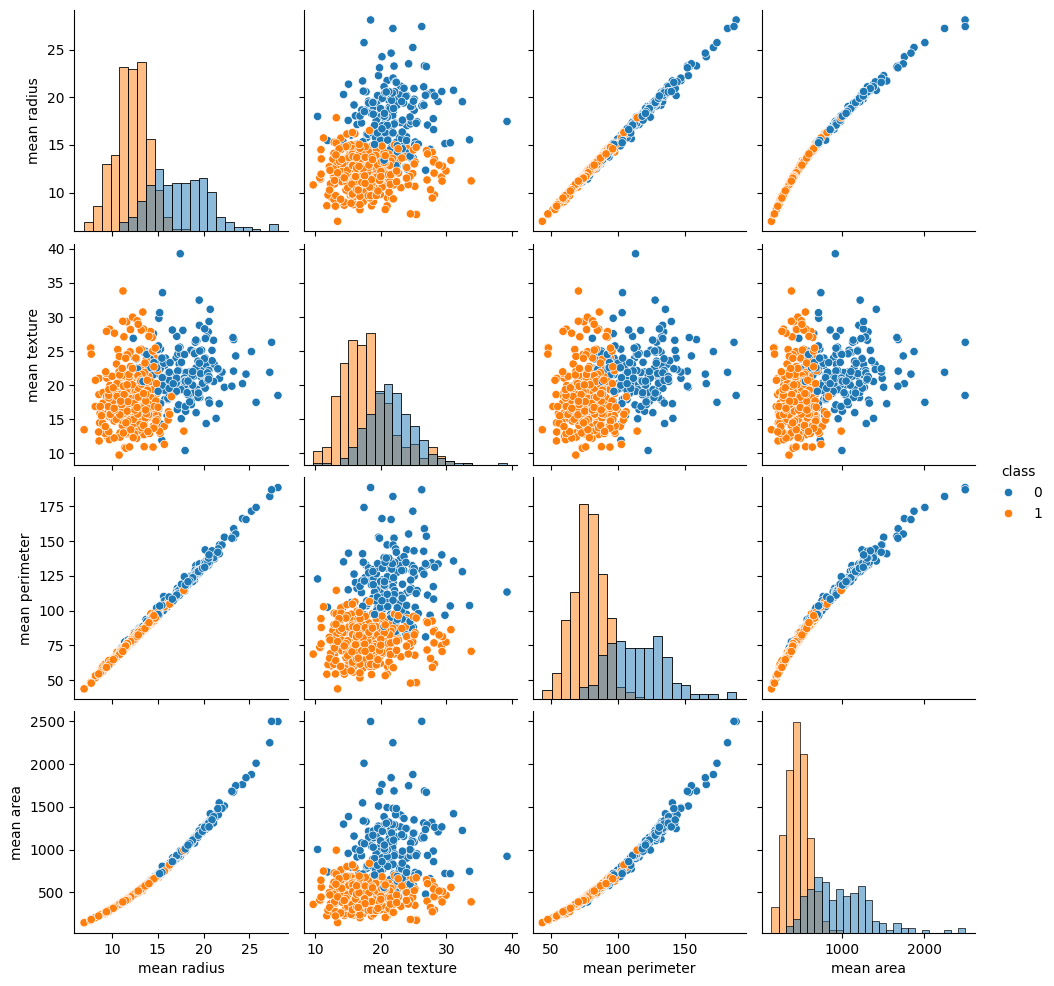

In [ ]:
# Criando seaborn.pairplot

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_cancer, hue='class', diag_kind="hist")

#Gráfico de correlação:

De acordo com Larson e Farber (2016), o coeficiente de correlação linear é uma medida que avalia a força e a direção da relação entre duas variáveis quantitativas. Esse coeficiente é representado pela letra r e é conhecido como coeficiente de correlação produto-momento de Pearson.

Características principais:

Intervalo de valores: r varia entre -1 e 1.

r = 1: correlação linear positiva perfeita.

r = -1: correlação linear negativa perfeita.

r = 0: ausência de correlação linear.

Interpretação:

Quanto mais próximo de 1, mais forte é a correlação positiva.

Quanto mais próximo de -1, mais forte é a correlação negativa.

Valores próximos de 0 indicam uma correlação fraca ou inexistente.

O coeficiente de correlação linear é uma ferramenta essencial na estatística para entender a relação entre duas variáveis e é amplamente utilizado em análises de regressão e estudos de associação.


---


LARSON, Roland Edwin; FARBER, Betsy. Estatística aplicada. 6. ed. São Paulo, SP: Pearson, 2015. E-book. Páginas: 439-451 Disponível em: https://plataforma.bvirtual.com.br. Acesso em: 29 maio 2025.

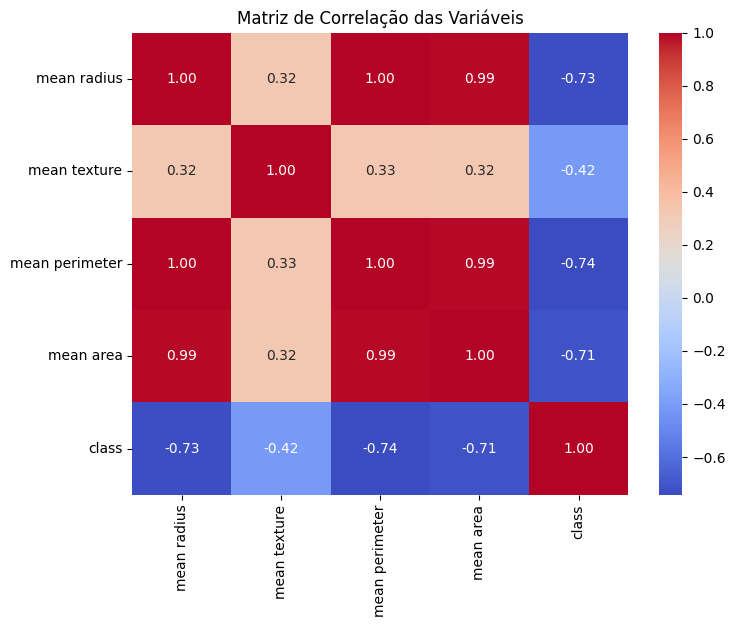

In [ ]:
# Criando matriz de correlação

# Calcular a matriz de correlação
correlation_matrix = df_cancer.corr()

# Criar um heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

#Analisando correlação:

## Correlação entre as variáveis explicativas:

mean radius x mean perimeter =	1.00	Correlação forte — essas variáveis estão essencialmente medindo a mesma coisa (tamanho da célula).

mean radius x mean area =	0.99	Correlação forte — redundância entre variáveis de tamanho.

mean perimeter x mean area =	0.99	Correlação forte — indica multicolinearidade.

mean texture x outras =	~0.32	— Correlação fraca com outras variáveis, indicando que captura um aspecto diferente (textura superficial da célula).

As variáveis de tamanho (raio, perímetro, área) são altamente correlacionadas entre si, o que pode gerar multicolinearidade em modelos como regressão logística ou redes neurais. Já a textura média pode agregar informação nova e não redundante.


---

## Correlação com a variável alvo (class):

mean perimeter =	-0.74	Forte correlação negativa — perímetros maiores tendem a estar ligados à classe 1 (maligno).

mean radius =	-0.73	Forte correlação negativa — tumores com maior raio médio também tendem a ser malignos.

mean area = -0.71	Forte correlação negativa — tumores com maior área média são mais propensos a serem malignos.

mean texture =	-0.42	Correlação moderada — textura maior também está associada a malignidade, mas de forma menos expressiva.

Essas correlações negativas indicam que valores mais altos nas variáveis estão associados à classe 1 (maligno). Portanto, essas variáveis são potencialmente úteis para predição.


---
## Conclusão geral:

* As variáveis de tamanho celular (raio, perímetro, área) têm forte poder preditivo, mas são altamente redundantes entre si.

* A variável mean texture é menos correlacionada com as outras, mas ainda traz contribuição útil ao modelo.

* A variável class está negativamente correlacionada com as outras, indicando que tumores malignos tendem a ter valores maiores nas variáveis de entrada.



#APLICAÇÃO DE MODELOS DE MACHINE LEARNING PARA PREVER SE O TUMOR É BENIGNO OU MALIGNO

In [ ]:
# Importações necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Selecionar variáveis independentes e alvo
X = df_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]
y = df_cancer['class']  # 0 = benigno, 1 = maligno

# Dividir os dados em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Treinar modelos
# RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# SVC (Support Vector Classifier)
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
# Fazer previsões
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_svc = svc_model.predict(X_test_scaled)

Matriz de Confusão - RandomForest:


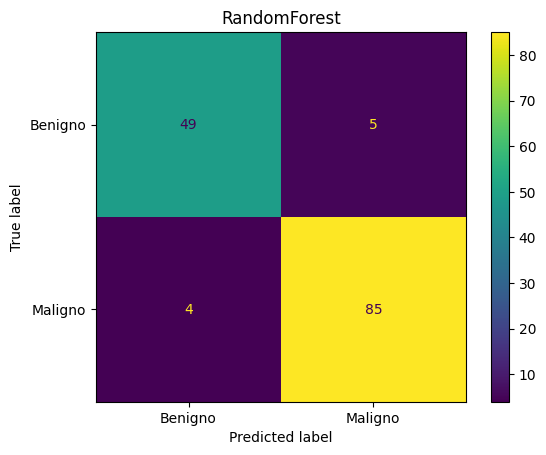

In [ ]:
# Matriz de confusão para RandomForest
print("Matriz de Confusão - RandomForest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Benigno', 'Maligno'])
disp_rf.plot()
plt.title("RandomForest")
plt.show()

Matriz de Confusão - SVC:


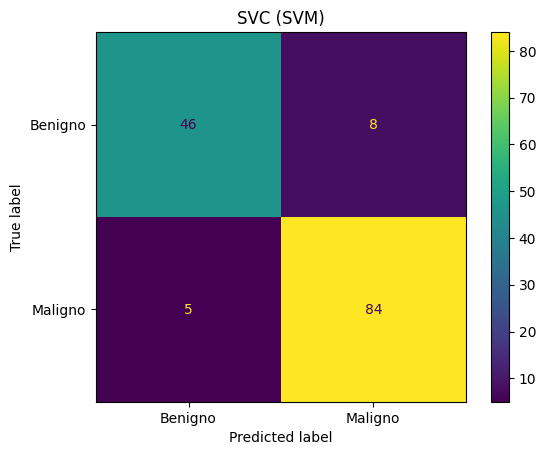

In [ ]:
# Matriz de confusão para SVC
print("Matriz de Confusão - SVC:")
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Benigno', 'Maligno'])
disp_svc.plot()
plt.title("SVC (SVM)")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Relatório para RandomForest
print("Relatório - RandomForest:")
print(classification_report(y_test, y_pred_rf, target_names=['Benigno', 'Maligno']))

# Relatório para SVC
print("Relatório - SVC (SVM):")
print(classification_report(y_test, y_pred_svc, target_names=['Benigno', 'Maligno']))

Relatório - RandomForest:
              precision    recall  f1-score   support

     Benigno       0.92      0.91      0.92        54
     Maligno       0.94      0.96      0.95        89

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Relatório - SVC (SVM):
              precision    recall  f1-score   support

     Benigno       0.90      0.85      0.88        54
     Maligno       0.91      0.94      0.93        89

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



#Conclusão:

Ambos os modelos apresentaram resultados muito satisfatórios na classificação dos tumores, porém o Random Forest demonstrou desempenho ligeiramente superior ao SVC em todas as métricas avaliadas. O modelo Random Forest se mostrou mais equilibrado, cometendo menos erros tanto na identificação de tumores benignos quanto malignos. Já o SVC, embora também eficaz, apresentou um número maior de falsos positivos, o que pode ser preocupante em contextos clínicos, pois pode levar a diagnósticos incorretos e gerar alarmes desnecessários para pacientes que não apresentam malignidade.